\newpage

In [1057]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn import svm

(1)

The goal is to predict whether a patient has heart disease based on 13 explanatory variables. The response variable which is categorical is expected to be binary (0-no heart disease, 1-presence of heart disease). However, there are 4 levels of presence of heart disease (1, 2, 3, 4) for the response variable. This causes the supervised classification problem, meaning that the classifiers are overfitting.

(2)

In [1058]:
df=pd.read_csv('https://archive.ics.uci.edu/static/public/45/data.csv')

In [1059]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [ ]:
# drop the missing data
df_dropnan=df.dropna()

The categorical variables such as num have already been used one-hot coding. We do not need to transform the response variable which is categorical.

(3)

In [1061]:
df.shape

(303, 14)

In [1062]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [1063]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [1064]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [1065]:
# drop the categorical variables to analyze the distributions
df_num=df.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num'])

In [1066]:
df_num.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [1067]:
# describe the categorical variables
df['sex'].value_counts()

sex
1    206
0     97
Name: count, dtype: int64

In [1068]:
df['cp'].value_counts()

cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64

In [1069]:
df['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [1070]:
df['restecg'].value_counts()

restecg
0    151
2    148
1      4
Name: count, dtype: int64

In [1071]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [1072]:
df['slope'].value_counts()

slope
1    142
2    140
3     21
Name: count, dtype: int64

In [1073]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

In [1074]:
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Numerical attributes: age, trestbps, chol, thalach, oldpeak, ca

Categorical attributes: sex, cp, fbs, restecg, exang, slope, thal, num (response variable)

There are 303 observations and 13 features in the dataset, while there are 4 missing values in ca and 2 missing values in thal. The variable chol has the largest variance and widest range. The variable which has the high variance can dominate clustering results, making other variables less influential.

(4)

In [1075]:
df['num']=df['num'].apply(lambda x: 1 if x>0 else 0)

In [1076]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


(5)

In [1077]:
correlation=df.corr()
correlation


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.424510


In [1078]:
correlation['num'].sort_values(ascending=False)

num         1.000000
thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: num, dtype: float64

The variable thal has the most positive correlation with the response variable num. The variable thalach has the only negative correlation with the response variable num. The variables such as thal, ca, oldpeak, and thalach have the strong relationship with the response variable num since they have the large absolute correlation. The variables such as fbs and chol have the weak correlation with the response variable num. For the feature selection, the variables have the strong correlation are considered to keep, while the variables have the weak correlation are considered to remove.

(6)

In [1079]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
# drop the missing data
df=df.dropna()

There are 4 missing values in ca and 2 missing values in thal.

(7)

In [1081]:
# drop the categorical variables to analyze the distributions
df_num=df.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num'])

In [1082]:
scaler=StandardScaler()

df_num_sc=pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num_sc

,age,trestbps,chol,thalach,oldpeak,ca
0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.721976
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2.478425
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.411625
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.721976
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.721976
...,...,...,...,...,...,...
292,0.272059,0.468418,-0.122330,-1.161395,-0.734914,-0.721976
293,-1.056185,-1.223355,0.320744,-0.768432,0.124076,-0.721976
294,1.489615,0.693988,-1.047008,-0.375469,2.013854,1.411625
295,0.272059,-0.095506,-2.241384,-1.510696,0.124076,0.344824


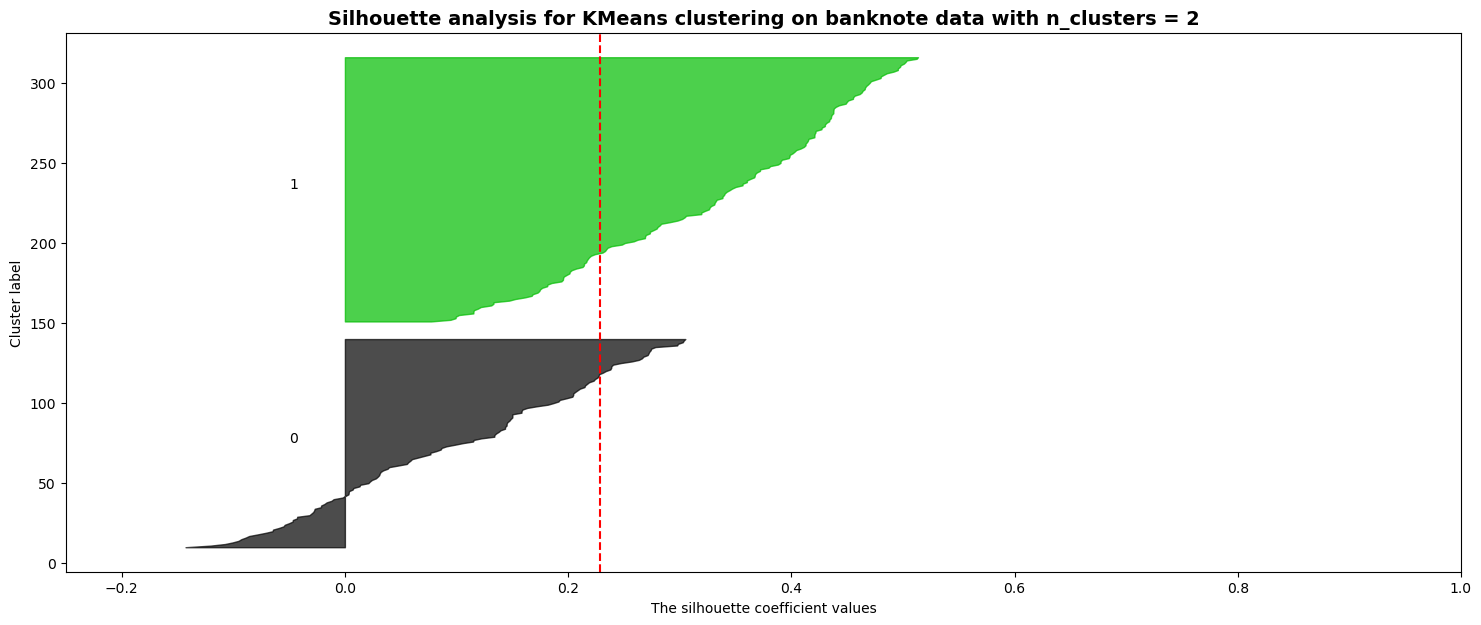

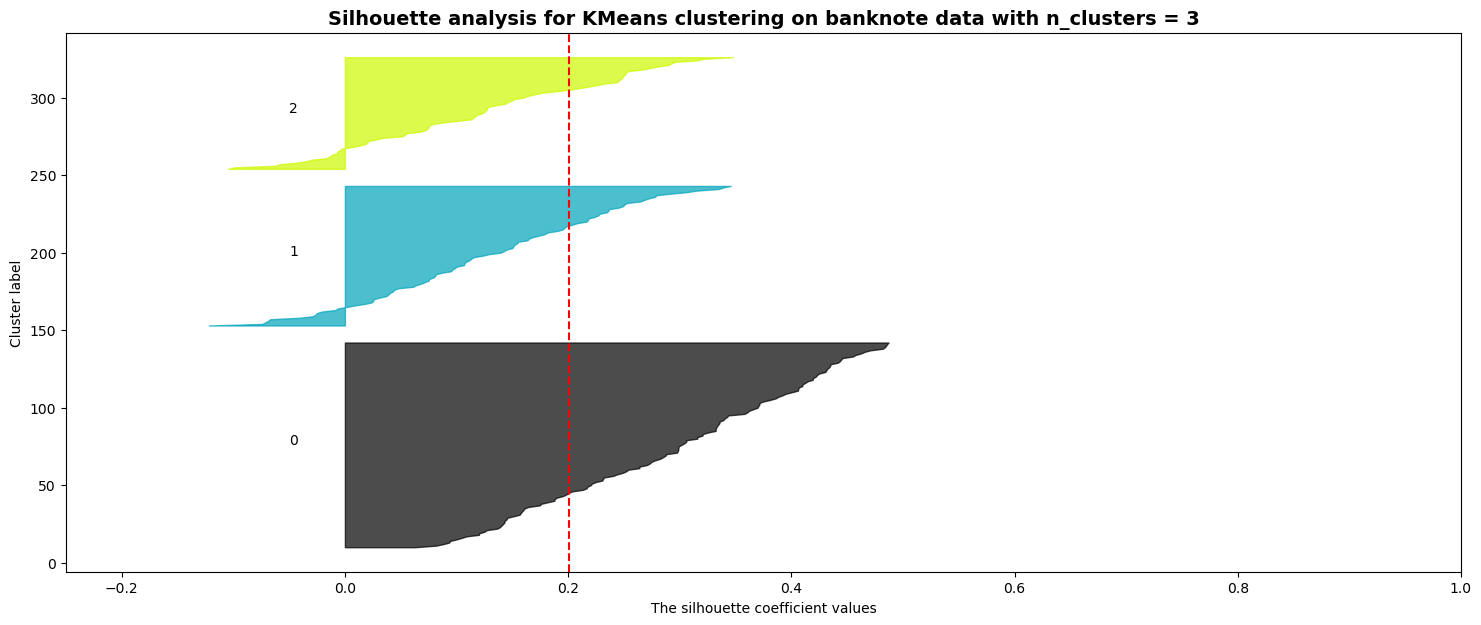

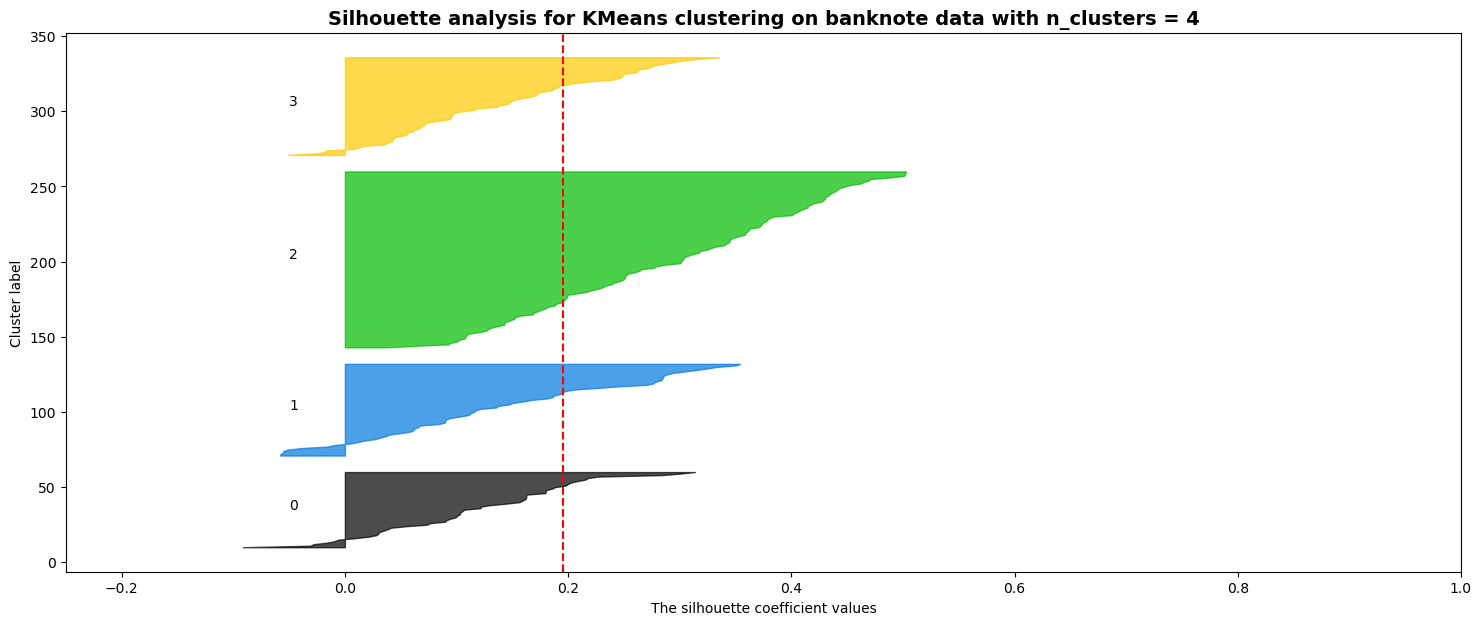

In [1083]:
range_n_clusters = range(2, 5)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(df_num_sc)
    silhouette_avg_km = silhouette_score(df_num_sc, cluster_labels_km)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_num_sc, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on banknote data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

In [1084]:
# choose n_clusters=2
kmeans_optimal=KMeans(n_clusters=2, n_init=20, random_state=42)
cluster_labels_optimal=kmeans_optimal.fit_predict(df_num_sc)

In [1085]:
pca=PCA()

In [1086]:
pca.fit(df_num_sc)

PCA()

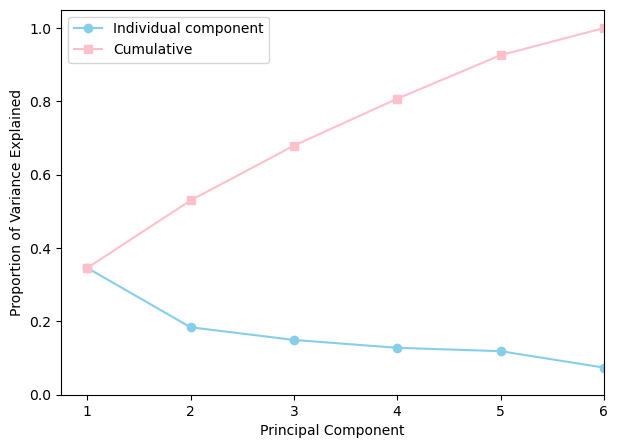

In [ ]:
# scree plot
plt.figure(figsize=(7, 5))

plt.plot([1,2,3,4,5,6], pca.explained_variance_ratio_, '-o', label='Individual component', 
         color='skyblue')
plt.plot([1,2,3,4,5,6], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative', 
         color='pink')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2);

In [1088]:
pca_2=PCA(n_components=2)

In [1089]:
pca_2.fit(df_num_sc)

PCA(n_components=2)

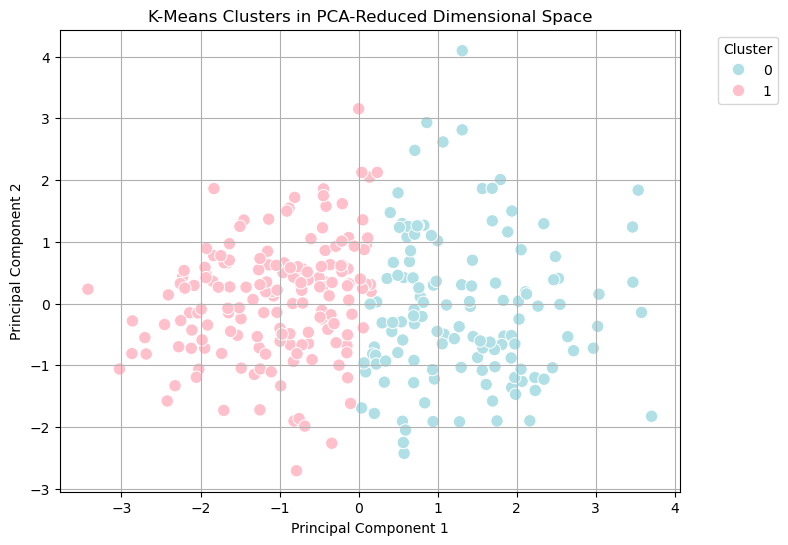

In [1090]:
pca_2.fit_transform(df_num_sc)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_2.fit_transform(df_num_sc)[:, 0],
    y=pca_2.fit_transform(df_num_sc)[:, 1],
    hue=cluster_labels_optimal,
    palette=['powderblue', 'pink'],
    s=80
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters in PCA-Reduced Dimensional Space')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

(8)

In [1091]:
df_drop=df.drop(columns=['num'])

In [1092]:
scaler=StandardScaler()

df_sc=pd.DataFrame(scaler.fit_transform(df_drop), columns=df_drop.columns)
df_sc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.272059,-1.446980,0.873880,0.468418,-0.122330,-0.411450,-1.003419,-1.161395,1.435916,-0.734914,0.643781,-0.721976,1.172577
293,-1.056185,0.691095,-2.240629,-1.223355,0.320744,-0.411450,-1.003419,-0.768432,-0.696419,0.124076,0.643781,-0.721976,1.172577
294,1.489615,0.691095,0.873880,0.693988,-1.047008,2.430427,-1.003419,-0.375469,-0.696419,2.013854,0.643781,1.411625,1.172577
295,0.272059,0.691095,0.873880,-0.095506,-2.241384,-0.411450,-1.003419,-1.510696,1.435916,0.124076,0.643781,0.344824,1.172577


In [1093]:
X=df_sc
y=df['num']

In [1094]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3, 
    random_state=1, 
    stratify=y
    )

(9)

1. Logistic Regression: We refer the coefficients to indicate the feature influence and see how each feature affects the probability of heart disease.

2. KNN: We refer the similarity to nearby data points to predict classes of presence of heart disease.

(10)

1. Accuracy: It is computed by the proportion of correctly predicted observations out of the total observations using confusion matrix.

2. ROC-AUC: We plot True Positive Rate vs. False Positive Rate for ROC curve and calculate AUC which is the area under the ROC curve to see how well the model can distinguish between classes across all classification thresholds.

(11)

In [1095]:
# logistic regression
log_param_grid={'C': [0.01, 0.1, 1, 10, 100],}

In [1096]:
log_grid_search=GridSearchCV(LogisticRegression(), 
                             log_param_grid,
                             cv=5,
                             scoring='accuracy')

log_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [1097]:
log_grid_search.best_estimator_

LogisticRegression(C=0.01)

In [1098]:
# optimal tuning parameters - best C
log_grid_search.best_params_

{'C': 0.01}

In [1099]:
# knn
knn_param_grid={'n_neighbors': list(range(1, 20))}

In [1100]:
knn_grid_search=GridSearchCV(KNeighborsClassifier(), 
                      knn_param_grid, 
                      cv=5, 
                      scoring='accuracy')

knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [1101]:
knn_grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [1102]:
# optimal tuning parameters - best n_neighbors
knn_grid_search.best_params_

{'n_neighbors': 7}

(12)

In [1103]:
# feature selection
efs=EFS(
    LogisticRegression(),
    min_features=1,
    max_features=5,
    scoring='accuracy',
    cv=5)

efs.fit(X_train, y_train)

Features: 2379/2379

ExhaustiveFeatureSelector(estimator=LogisticRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12]],
                          max_features=5)

In [1104]:
best_features=list(efs.best_feature_names_)
best_features

['sex', 'exang', 'ca', 'thal']

In [1105]:
X_train_efs=X_train[best_features]
X_test_efs=X_test[best_features]

In [1106]:
efs_log_grid_search=GridSearchCV(LogisticRegression(), 
                                 log_param_grid, 
                                 cv=5, 
                                 scoring='accuracy')

efs_log_grid_search.fit(X_train_efs, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [1107]:
efs_log_grid_search.best_estimator_

LogisticRegression(C=0.1)

In [1108]:
# optimal tuning parameters - best C
efs_log_grid_search.best_params_

{'C': 0.1}

(13)

In [1109]:
best_log=log_grid_search.best_estimator_

log_pred_prob=best_log.predict_proba(X_test)[:, 1]

log_y_pred=best_log.predict(X_test)

In [1110]:
accuracy_score(y_test, log_y_pred)

0.8555555555555555

In [1111]:
best_knn=knn_grid_search.best_estimator_

knn_pred_prob=best_knn.predict_proba(X_test)[:, 1]

knn_y_pred=best_knn.predict(X_test)

In [1112]:
accuracy_score(y_test, knn_y_pred)

0.8222222222222222

In [1113]:
best_efs_log=efs_log_grid_search.best_estimator_

efs_log_pred_prob=best_efs_log.predict_proba(X_test_efs)[:, 1]

efs_log_y_pred=best_efs_log.predict(X_test_efs)

In [1114]:
accuracy_score(y_test, efs_log_y_pred)

0.7444444444444445

In [1115]:
roc_auc_score(y_test, log_pred_prob)

0.9136904761904763

In [1116]:
roc_auc_score(y_test, knn_pred_prob)

0.8973214285714285

In [1117]:
roc_auc_score(y_test, efs_log_pred_prob)

0.8591269841269841

Among the three classifiers tested — Logistic Regression, K-Nearest Neighbors (KNN), and Logistic Regression with feature selection, all perform well in terms of accuracy and ROC-AUC. Logistic Regression achieves the highest accuracy score and ROC-AUC score, suggesting it has the most efficiency of distinguishing between patients with and without heart disease.

The accuracy score and ROC-AUC score of Logistic Regression get lower after applying EFS. While EFS helps reduce dimensionality and may prevent over-fitting in high-dimensional settings in the dataset. Over-simplifying can actually hurt performance, suggesting all features contribute meaningfully.

(14)

In [1118]:
m_log=LogisticRegression()
m_log.fit(X_train, y_train)

LogisticRegression()

In [1119]:
coefficient=pd.DataFrame(m_log.coef_, columns=df_drop.columns)
coefficient

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.098968,0.783227,0.553553,0.332895,0.38974,-0.412099,0.041425,-0.439762,0.529723,0.194363,0.286665,0.833947,0.678515


In [1120]:
# Question 12
best_features=list(efs.best_feature_names_)
best_features

['sex', 'exang', 'ca', 'thal']

The top important variables are: ca, sex, thal, exang since they have the highest absolute value of coefficients. These features are strongly associated with the presence of heart disease.

(15)

In [1121]:
# the fourth classifier
clf=svm.SVC(kernel="linear")

In [1122]:
svm_param_grid={'C': [0.1, 1, 10, 100, 1000]}

In [1123]:
svm_grid_search=GridSearchCV(
    estimator=clf, 
    param_grid=svm_param_grid, 
    cv=5, 
    scoring='accuracy'
    )

svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, scoring='accuracy')

In [1124]:
svm_grid_search.best_estimator_

SVC(C=0.1, kernel='linear')

In [1125]:
# optimal tuning parameters - best C
svm_grid_search.best_params_

{'C': 0.1}

In [1126]:
clf_best_c=svm_grid_search.best_estimator_

In [1127]:
best_clf=svm.SVC(kernel="linear", C=clf_best_c.C, probability=True)

In [1128]:
best_clf.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [1129]:
clf_pred_prob=best_clf.predict_proba(X_test)[:, 1]
clf_y_pred=best_clf.predict(X_test)

In [1130]:
accuracy_score(y_test, clf_y_pred)

0.8666666666666667

In [1131]:
roc_auc_score(y_test, clf_pred_prob)

0.898809523809524

The accuracy score for the fourth classifier slightly increases, and the ROC-AUC score almost keeps the same for the fourth classifier, showing a better performance. This suggests that sub-groups have distinct characteristics.

\newpage

## References

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.